In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 5)
 
import yfinance as yf
from datetime import datetime as dt
from datetime import timedelta

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

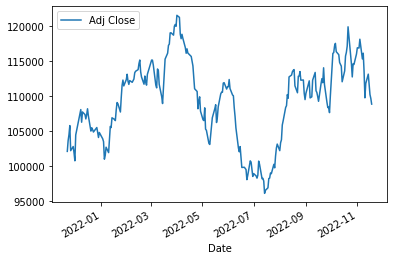

In [2]:
stock = '^BVSP'
start = dt.today() - timedelta(365)
end = dt.today()
fn = yf.download(stock, start, end)

df = pd.DataFrame(fn)

df = df.drop(columns=['High', 'Open', 'Low', 'Volume', 'Close'])
df.plot()

<AxesSubplot:xlabel='Date'>

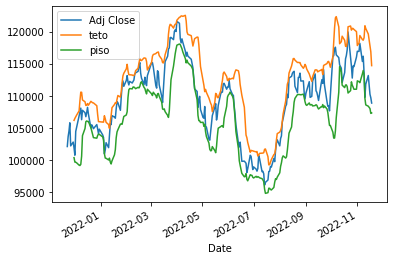

In [3]:
df["teto"] = df['Adj Close'].rolling(window=7).mean() + (2 * df['Adj Close'].rolling(window=7).std())
df["piso"] = df['Adj Close'].rolling(window=7).mean() - (2 * df['Adj Close'].rolling(window=7).std())

df.plot()

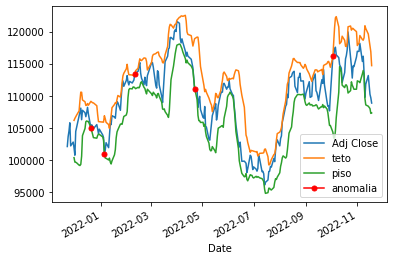

In [5]:
df["anomalia"] = df.apply(lambda row: 
                          row['Adj Close'] if (row['Adj Close']<=row["piso"] or row[0]>=row["teto"]) else None,axis=1)
df.drop(['anomalia'],axis=1).plot()
plt.plot(df.index, df.anomalia,color='red',marker='o',markersize=5,label='anomalia')
plt.legend()

plt.show()